In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from scipy import spatial

from preprocessing import *

In [2]:
train = json.load(open('../data/train.json'))
train = pd.DataFrame(train).T

In [3]:
def extract_keywords(list):
    all_keywords = []
    for i in list:
        all_keywords.append(i)
    
    return all_keywords

In [35]:
model = Word2Vec(extract_keywords(train.keywords), min_count=1, vector_size=128)

Visualise word vectors using PCA

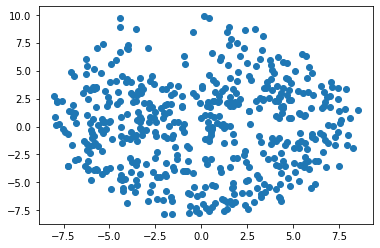

In [36]:
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
plt.show()

In [37]:
import torch
from torch.nn.functional import cosine_similarity

x1 = torch.tensor(model.wv.get_vector(123))
x2 = torch.tensor(model.wv.get_vector(125))
cosine_similarity(x1, x2, dim=0)

tensor(0.7539)

In [39]:
model.save('word2vec.bin')

In [7]:
def get_vector(s):
    return np.sum(np.array([model.wv[i] for i in s]), axis=0)

In [8]:
train

,venue,keywords,year,author
0,,"[64, 1, 322, 134, 136, 396, 270, 144, 476, 481...",2017,"[1605, 759]"
1,0,"[258, 260, 389, 261, 390, 396, 400, 17, 146, 2...",2013,[2182]
2,1,"[320, 454, 266, 462, 17, 339, 404, 342, 407, 2...",2007,[2176]
3,2,"[260, 132, 333, 15, 400, 272, 146, 401, 278, 3...",2013,[1107]
4,3,"[64, 385, 449, 450, 71, 73, 268, 80, 216, 25, ...",2009,[1414]
...,...,...,...,...
26103,252,"[384, 320, 136, 457, 75, 17, 146, 465, 468, 21...",2011,"[656, 595]"
26104,50,"[318, 70, 457, 459, 396, 77, 146, 404, 468, 40...",2008,[876]
26105,6,"[320, 260, 69, 9, 265, 461, 156, 476, 166, 425...",2008,[535]
26106,138,"[450, 70, 198, 233, 394, 300, 492, 368, 246, 4...",2015,[1954]


In [9]:
t = json.load(open('../data/train.json'))
t = train_preprocessing(t)
t = pd.DataFrame(t).T

In [10]:
len(set(t.target))

2302

In [31]:
cosine_similarity(a, b, dim=0) >= 0

tensor(True)

In [39]:
a = torch.tensor([1, 5, 231, 123, 13])
b = torch.ones(5)

In [40]:
cosine_similarity(a, b, dim=0)

tensor(0.6365)

In [11]:
t

,venue,keywords,year,coauthor,target
0,,"[64, 1, 322, 134, 136, 396, 270, 144, 476, 481...",2017,[759],1605
1,,"[64, 1, 322, 134, 136, 396, 270, 144, 476, 481...",2017,[1605],759
2,0,"[258, 260, 389, 261, 390, 396, 400, 17, 146, 2...",2013,[],2182
3,1,"[320, 454, 266, 462, 17, 339, 404, 342, 407, 2...",2007,[],2176
4,2,"[260, 132, 333, 15, 400, 272, 146, 401, 278, 3...",2013,[],1107
...,...,...,...,...,...
47995,50,"[318, 70, 457, 459, 396, 77, 146, 404, 468, 40...",2008,[],876
47996,6,"[320, 260, 69, 9, 265, 461, 156, 476, 166, 425...",2008,[],535
47997,138,"[450, 70, 198, 233, 394, 300, 492, 368, 246, 4...",2015,[],1954
47998,33,"[260, 261, 132, 454, 136, 461, 14, 17, 146, 33...",2009,[1091],1417


In [47]:
import torch
from torch.nn.functional import cosine_similarity

x1 = torch.tensor(model.wv.get_vector(123))
x2 = torch.tensor(model.wv.get_vector(125))
cosine_similarity(x1, x2, dim=0)

tensor(0.7787)

In [13]:
print(1 - spatial.distance.cosine(get_vector(t.keywords[0]), get_vector(train.keywords[0])))

1.0


In [14]:
set([1, 2, 3, 4, 5]) - set([7, 8])

{1, 2, 3, 4, 5}